In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error

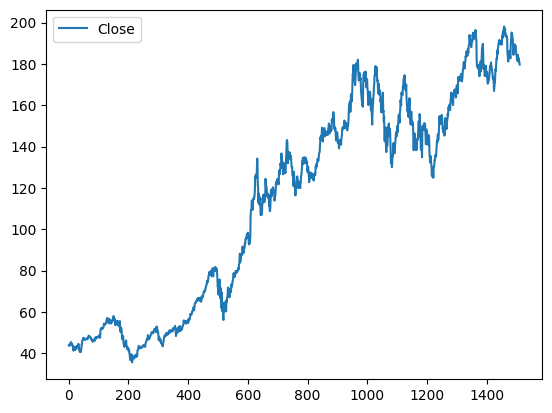

,Close
0,43.750000
1,44.052502
2,44.205002
3,44.167500
4,43.757500
...,...
1506,181.160004
1507,182.630005
1508,181.419998
1509,180.750000


In [2]:
df = pd.read_csv('D:\IS403_O21_HTCL_15\Dataset\AAPL.csv')

df = df[['Close']]

df.plot()
plt.show()
df

In [3]:
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size)])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Đảm bảo dữ liệu là một mảng numpy
data = df['Close'].values

# Định nghĩa kích thước cửa sổ
window_size = 10
X, y = create_dataset(data, window_size)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [4]:
# Xây dựng mô hình MLP
model = Sequential()
model.add(Dense(units=50, activation='relu', input_dim=window_size))
model.add(Dense(units=25, activation='relu'))
model.add(Dense(units=1))

# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Hiển thị cấu trúc mô hình
model.summary()

c:\Users\GIAHUY\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │           550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,851 (7.23 KB)

 Trainable params: 1,851 (7.23 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))


Epoch 1/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6039.4932 - val_loss: 12.7297
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.0738 - val_loss: 12.8909
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.9495 - val_loss: 11.9466
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.3876 - val_loss: 11.7383
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.8819 - val_loss: 11.2314
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7993 - val_loss: 11.1480
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.7001 - val_loss: 11.3259
Epoch 8/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.8526 - val_loss: 16.6978
Epoch 9/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.2770 - val_loss: 14.9011
Epoch 10/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.2269 - val_loss: 10.7722
Epoch 11/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.2929 - val_loss: 10.9802
Epoch 12/100
120/120 ━━━━

In [6]:
# from sklearn.metrics import mean_squared_error

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình bằng Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Mean Squared Error: 6.34994193525042


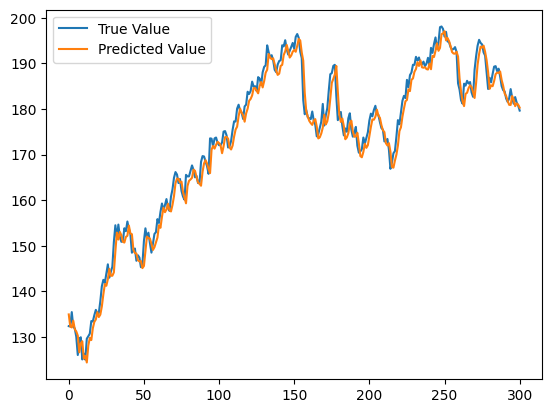

In [7]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='Predicted Value')
plt.legend()
plt.show()
